# Introductory applied machine learning
# Assignment 1

## Important Instructions
#### <span style="color:blue">SUBMISSION INSTRUCTIONS WILL BE REALEASED SHORTLY</span>

**It is important that you carefully follow the instructions below for things to work properly.**

1. You need to have your environment set up as in the [README](https://github.com/amosstorkey/iaml-labs) and you need to activate this environment before running this notebook:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer.

### SUBMISSION Mechanics

This assignment is formative and such will not count towards your final grade. Nonetheless, we ask you to submit answers to certain questions so that you can become familiar with the Gradescope system and so that we can summarize common mistakes people might make.

We will be using [Gradescope](https://www.gradescope.com/) for submissions. Submission instructions will be released separately shortly. You will be using a separate Latex-based file where you would copy your answers and/or code.

**IMPORTANT: Only specific questions need to be submitted. These are Question 2.2, Question 2.6, Question 4.3 and Question 4.4,**

The submission deadline for this assignment by **Monday 14/10/2019 at 16:00**. 

Since this assignment is formative, there will be no marking assigned.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [40]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

# Question 1
## 20 Newsgroup Dataset 

### Description of the dataset

This question is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [5]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path, delimiter = ',')

(2) ***Your answer goes here:***

This dataset shows the frequency of attributes (i.e. a particular word) appearing in a given sample of documents (2257 documents to be precise), which is used to classify each sample as a particular class of document. 


### ========== Question 1.2 ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [3]:
# (1) # Your Code goes here:
news_raw.columns[0:10]

Index(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens', 'w6_dwyer',
       'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home'],
      dtype='object')

(2) ***Your answer goes here:***

The attributes are words whose frequency is counted in the documents.

# Question 2
## Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.21/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [18]:
# Your Code goes here:
data_path_train = os.path.join(os.getcwd(), 'datasets', 'train_20news.csv')
news_train = pd.read_csv(data_path_train, delimiter = ',')

data_path_test = os.path.join(os.getcwd(), 'datasets', 'test_20news.csv')
news_test = pd.read_csv(data_path_test, delimiter = ',')

print(news_train.describe())
print(news_test.describe())

            w1_aaa      w2_pins       w3_kmr    w4_notion    w5_queens  \
count  2099.000000  2099.000000  2099.000000  2099.000000  2099.000000   
mean      1.025727     1.017627     1.014769     1.008576     1.006193   
std       0.280109     0.205208     0.172657     0.115206     0.078473   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       8.000000     7.000000     5.000000     4.000000     2.000000   

          w6_dwyer  w7_defenseman       w8_gld   w9_tocchet     w10_home  \
count  2099.000000    2099.000000  2099.000000  2099.000000  2099.000000   
mean      1.010481       1.026203     1.024297     1.012387     1.084326   
std       0.134174       0.618880     0.274219     0.153879     0.491139   
min       1.000000       1.00

### ========== Question 2.2 ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***

The Naive Bayes model assumes that the presence of a particular feature in a class is independent to the presence of any other feature in that class. 

(2/2) ***Your answer goes here:***

When we attempt to classify a new document, if we haven't seen it in the training data, we will be unable to classify it. This is because without the Naive Bayes assumption, if we observed a particular feature in a class, we would expect to find a given number of other features associated with that feature from the training data, to be able to classify the document in a particular way. Therefore, we wouldn't be able to classify any documents not seen in the training data. 

### ========== Question 2.3 ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

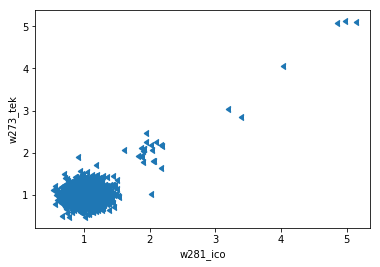

In [34]:
# (1) # Your Code goes here:
xdata = news_train['w281_ico'].values
ydata = news_train['w273_tek'].values
plt.xlabel('w281_ico')
plt.ylabel('w273_tek')
scatter_jitter(xdata, ydata, 0.8)

(2) ***Your answer goes here:***

The occurrence of 'ico' is positively correlated with the occurrence of 'tek': as the presence of one increases, so does the presence of the other. This doesn't impact the validity of the Naive Bayes assumption (which assumes all features are conditionally independent), it is simply a case where these words are present in the same kinds of documents. 

### ========== Question 2.4 ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***

In [58]:
# (2) # Your Code goes here:
dummy = DummyClassifier()

X = news_train.drop('class',axis=1)
y = news_train['class']
dummy.fit(X,y)
baseline = dummy.score(X, dummy.predict(X))
print("The baseline performance is {}.".format(baseline))

The baseline performance is 0.19818961410195332.


<a id='question_2_5'></a>
### ========== Question 2.5 ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [59]:
# (1) # Your Code goes here:
X_train = news_train.drop('class',axis=1)
y_train = news_train['class']

classifier = GaussianNB()

classifier.fit(X_train,y_train)

GaussianNB(priors=None)

In [60]:
# (2) # Your Code goes here:
accuracy = classifier.score(X_train,y_train)

print("Classification accuracy: {}".format(accuracy))

Classification accuracy: 0.8780371605526441


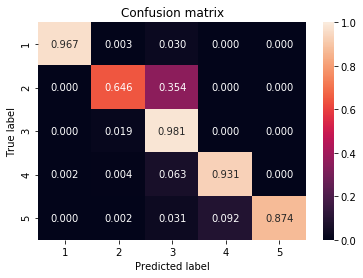

In [61]:
cm = confusion_matrix(y_train, classifier.predict(X_train))
plot_confusion_matrix(cm, classes=[1,2,3,4,5])

(3) ***Your answer goes here:***

### ========== Question 2.6 ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***

Yes, it does look like what I would have expected. The diagonal of a confusion matrix is meant to represent data that has been classified correctly; with a high classification accuracy, I would expect the diagonal of the confusion matrix to have high values on the diagonal and low values elsewhere. This is indeed the case on this confusion matrix.

### ========== Question 2.7 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

Classification accuracy: 0.8203125


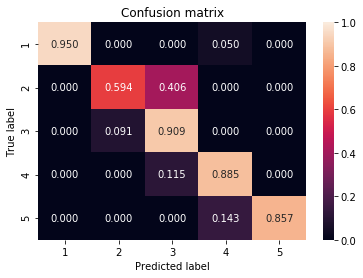

In [62]:
# (1) # Your Code goes here:
test_accuracy = classifier.score(X_test,y_test)

print("Classification accuracy: {}".format(test_accuracy))

cm_test = confusion_matrix(y_test, classifier.predict(X_test))
plot_confusion_matrix(cm_test, classes=[1,2,3,4,5])

In [63]:
# (2) # Your Code goes here:
baseline_test = dummy.score(X_test, dummy.predict(X_test))
print("The baseline performance is {}.".format(baseline_test))

The baseline performance is 0.140625.


(3) ***Your answer goes here:***

### ========== Question 2.8 ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

In [64]:
# (1) # Your Code goes here:
X_raw = news_raw.drop('class',axis=1)
y_raw = news_raw['class']

classifier_raw = GaussianNB()

classifier_raw.fit(X_raw,y_raw)

accuracy_raw = classifier_raw.score(X_test, y_test)
print("Classification accuracy: {}".format(accuracy_raw))

Classification accuracy: 0.171875


(2) ***Your answer goes here:***

### ========== Question 2.9 ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***

<a id='question_3'></a>
# Question 3
## Automobile Pricing Dataset

### Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_3_1'></a>
### ========== Question 3.1 ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [85]:
# (1) # Your Code goes here:
data_path_3 = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path_3, delimiter = ',')
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


(2) ***Your answer goes here:***

### ========== Question 3.2 ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

In [78]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

In [ ]:
# (3) # Your Code goes here:

(4) ***Your answer goes here:***

(5) ***Your answer goes here:***

# Question 4
## Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.21/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. In this question we will perform K-fold cross-validation using scikit's *KFold* class.**

<a id='question_4_1'></a>
### ========== Question 4.1  ==========

K-fold cross-validation.

1. [Text] What other technique for validation could we use (rather than K-Fold cross-validation)?

1. [Text] Given the analysis you did on the automobile dataset in [Question 3](#question_3), what problem are we trying to solve by using K-Fold cross-validation?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*


(1) ***Your answer goes here:***

(2) ***Your answer goes here:***

In [ ]:
# (3) # Your Code goes here:

### ========== Question 4.1  ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 3.1](#question_3_1), and evaluate it using the *KFold* instance you created in [Question 4.1](#question_4_1) (report RMSE and $R^2$). 

In [ ]:
# (1) # Your Code goes here:

### ========== Question 4.2 ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

In [ ]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

<a id='question_4_3'></a>
### ========== Question 4.3 ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

In [90]:
# (1) # Your Code goes here:

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 4.4 ==========

#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 4.3](#question_4_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 4.5 ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 4.3](#question_4_3).

(1) ***Your answer goes here:***

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***